# Analysis and Visualization of PISA 2012 Dataset
## by Debasree Banerjee

## Investigation Overview

> The Programme for International Student Assessment (PISA) is a worldwide study which examines the skills of 15-years old students from around the world. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science.

> The main objective of this analysis is to figure out how individual countries performed in Maths, Science and Reading and to investigate which countries were the top performer. Through this analysis it is also trying to figure out if factors like students' cultural background or learning time had any effect on the score obtained.  

## Dataset Overview

> The PISA 2012 dataset consists of 636 columns with 485490 entries. From which 26 columns have been chosen for this analysis. The columns or variables we chose for the analysis are country, age, maths score, reading score, science score, cultural background of father, mother, self, learning time of maths, reading and science etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012_Select.csv')

In [3]:
#change the name of the column to appropriate names
df.rename({'CNT' : 'Country', 'ST03Q02' : 'Birth_Year', 'ST04Q01' : 'Gender', 'COBN_F' : 'Birth_Country_Father', 
           'COBN_M' : 'Birth_Country_Mother', 'COBN_S' : 'Birth_Country_Self', 'LMINS' : 'Learning_Time_Language', 
          'MMINS' : 'Learning_Time_Maths', 'SMINS' : 'Learning_Time_Science'}, axis = 'columns', inplace = True)

In [4]:
#calculate the average of Maths, Science and Reading score

df['Maths_score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH'])/5
df['Reading_score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ'])/5
df['Science_score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE'])/5

In [5]:
df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                  'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

In [6]:
#assign the 'Missing' and 'Invalid' values to NaN
cols = ['Birth_Country_Father', 'Birth_Country_Mother', 'Birth_Country_Self']
df[cols] = df[cols].replace({'Missing' : np.nan, 'Invalid' : np.nan})

In [7]:
df['Parents_Cultural_Background'] = np.where(df['Birth_Country_Father'] == 
                                              df['Birth_Country_Mother'], 'Same', 'Different')

## Visualization 1

> In this visualization, the distribution of the score obtained by students in each individual subject is shown.

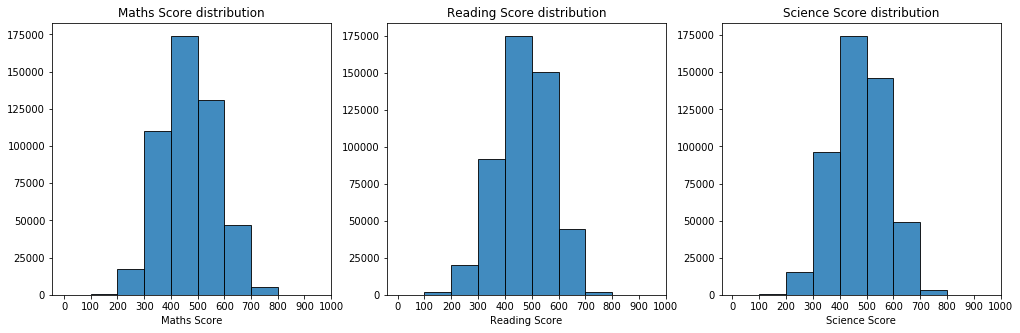

In [8]:
#plotting the histograms 
plt.figure(figsize = [17, 5])

plt.subplot(1,3,1)
bin_edges = np.arange(0, df['Maths_score'].max()+1, 100)
plt.hist(data = df, x = 'Maths_score', bins = bin_edges, ec = 'black', alpha = 0.85)
plt.xticks(np.arange(0, 1000+1, 100))
plt.xlabel('Maths Score')
plt.title("Maths Score distribution")

plt.subplot(1,3,2)
bin_edges = np.arange(0, df['Reading_score'].max()+1, 100)
plt.hist(data = df, x = 'Reading_score', bins = bin_edges, ec = 'black', alpha = 0.85)
plt.xticks(np.arange(0, 1000+1, 100))
plt.xlabel('Reading Score')
plt.title("Reading Score distribution")

plt.subplot(1,3,3)
bin_edges = np.arange(0, df['Science_score'].max()+1, 100)
plt.hist(data = df, x = 'Science_score', bins = bin_edges, ec = 'black', alpha = 0.85)
plt.xticks(np.arange(0, 1000+1, 100))
plt.xlabel('Science Score')
plt.title("Science Score distribution");

## Visualization 2

> In this visualization, countries which performed best in each individual subject are shown. Here, students who scored above 800 points in each individual subject are extracted and shown according to their country of origin.

In [9]:
#retrieve entries of students who scored more than 800 in all the three subjects with their countries
high_math_score = df[df['Maths_score'] >800]['Country'].value_counts()
high_reading_score = df[df['Reading_score'] >800]['Country'].value_counts()
high_science_score = df[df['Science_score'] >800]['Country'].value_counts()

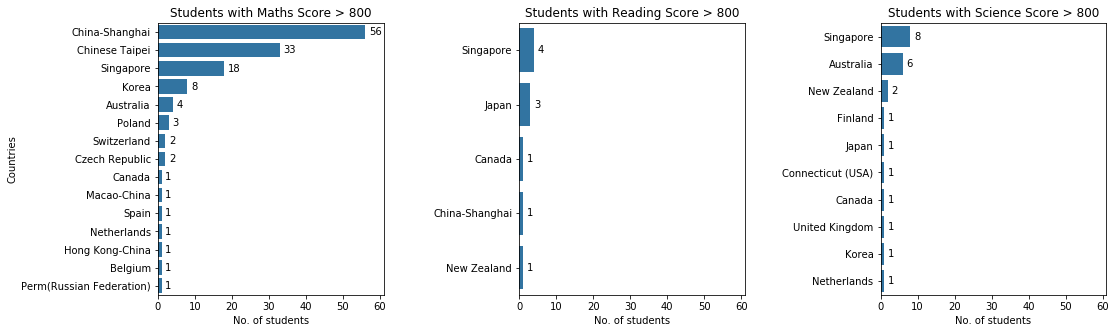

In [10]:
#plotting the horizontal bar chart
plt.figure(figsize = [17, 5])
#adjusting the white space between plots
plt.subplots_adjust(wspace = 0.6)
#to show the text counts properly next to the bars
x_lim_max = high_math_score.values[0]+5

plt.subplot(1,3,1)
base_color = sb.color_palette()[0]
sb.barplot( y = high_math_score.index, x = high_math_score.values, color = base_color)
plt.title('Students with Maths Score > 800')
plt.xlabel('No. of students')
plt.ylabel('Countries')

#write the number of students achieved high score next to the bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_math_score[label.get_text()] +1, 
             s = high_math_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max)

plt.subplot(1,3,2)
base_color = sb.color_palette()[0]
sb.barplot( y = high_reading_score.index, x = high_reading_score.values, color = base_color)
plt.title('Students with Reading Score > 800')
plt.xlabel('No. of students')

#write the number of students achieved high score next to the bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_reading_score[label.get_text()] +1, 
             s = high_reading_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max)

plt.subplot(1,3,3)
base_color = sb.color_palette()[0]
sb.barplot( y = high_science_score.index, x = high_science_score.values, color = base_color)
plt.title('Students with Science Score > 800')
plt.xlabel('No. of students')

#write the number of students achieved high score next to the bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_science_score[label.get_text()] +1, 
             s = high_science_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);

## Visualization 3

> In this visualization, the relationship between learning time and score obtained in each subject is shown in a heat map. 

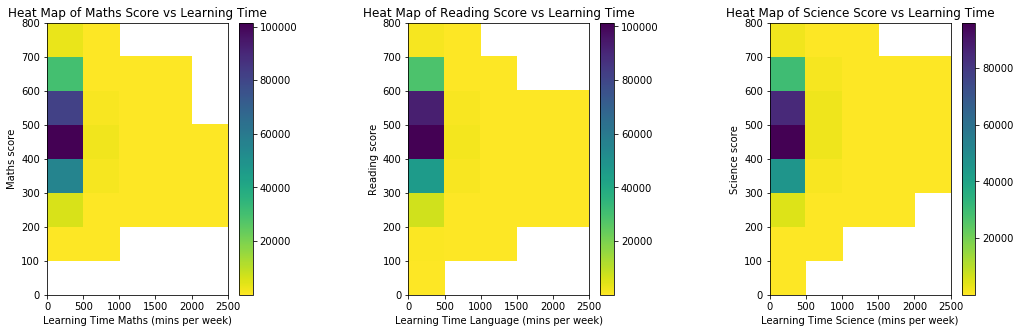

In [13]:
plt.figure(figsize = [17,5])
#adjusting the white space between plots
plt.subplots_adjust(wspace = 0.6)

plt.subplot(1,3,1)
bins_x = np.arange(0, 3000, 500)
bins_y = np.arange(0, 850, 100)
plt.hist2d(data = df, x = 'Learning_Time_Maths', y = 'Maths_score',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Learning Time Maths (mins per week)')
plt.ylabel('Maths score')
plt.title('Heat Map of Maths Score vs Learning Time')

plt.subplot(1,3,2)
bins_x = np.arange(0, 3000, 500)
bins_y = np.arange(0, 850, 100)
plt.hist2d(data = df, x = 'Learning_Time_Language', y = 'Reading_score',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Learning Time Language (mins per week)')
plt.ylabel('Reading score')
plt.title('Heat Map of Reading Score vs Learning Time')


plt.subplot(1,3,3)
bins_x = np.arange(0, 3000, 500)
bins_y = np.arange(0, 850, 100)
plt.hist2d(data = df, x = 'Learning_Time_Science', y = 'Science_score',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Learning Time Science (mins per week)')
plt.ylabel('Science score')
plt.title('Heat Map of Science Score vs Learning Time');

## Visualization 4

> This visualization depicted the effect of parents cultural background on the score obtained by the students. The parents cultural background were classified as same or different depending upon the cultural backgrounds of both parents matched with each other or not. 

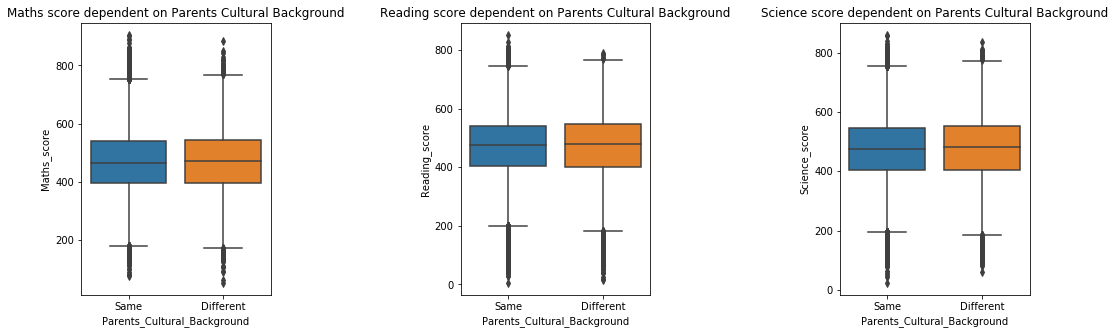

In [14]:
plt.figure(figsize = [17,5])
#adjusting the white space between plots
plt.subplots_adjust(wspace = 1)

plt.subplot(1,3,1)
sb.boxplot(x = df['Parents_Cultural_Background'], y = df['Maths_score'])
plt.title('Maths score dependent on Parents Cultural Background')

plt.subplot(1,3,2)
sb.boxplot(x = df['Parents_Cultural_Background'], y = df['Reading_score'])
plt.title('Reading score dependent on Parents Cultural Background')

plt.subplot(1,3,3)
sb.boxplot(x = df['Parents_Cultural_Background'], y = df['Science_score'])
plt.title('Science score dependent on Parents Cultural Background');

## Visualization 5

> The correlation between the score obtained in each individual subject is portrayed in this visualization. It shows that the student who obtained high marks in one subject had scored high in other two subjects as well.

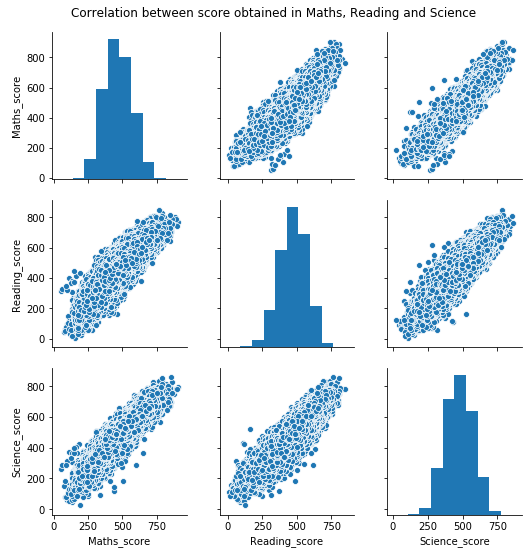

In [15]:
grid = sb.pairplot(data = df, vars = ['Maths_score', 'Reading_score', 'Science_score']);
grid.fig.suptitle("Correlation between score obtained in Maths, Reading and Science", y = 1.02);

## Conclusion

>From the above analysis and visualization, we can summarize that:

>- In PISA 2012 test, Asian countries performed best in all the three subjects (Maths, Reading and Science) with China as the top performer.

>- Parents Cultural Background had slight effect on the score obtained in the three subjects. Students who come from a different background had shown a little bit higher performance in the test.

>- There was a high correlation between the scores obtained in each individual subject. It can be seen from the visualization that student obtained high score in one subject, achieved high scores in the other two subjects.

>- It was also found that the learning time had not much of an influence on the score obtained. It can be concluded that there cannot be a single factor which influences the score rather than maybe a combination of factors effecting it.